In [321]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor 
%matplotlib inline

In [322]:

boston = load_boston()
print(type(boston))
print(boston.keys())
print(boston.DESCR)

<class 'sklearn.utils.Bunch'>
dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to

In [323]:
data = boston.data
print(type(data))
print(data.shape)

<class 'numpy.ndarray'>
(506, 13)


In [324]:
data = pd.DataFrame(data = data, columns= boston.feature_names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [325]:

data['Price'] = boston.target
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [326]:
corrmat = data.corr()
corrmat

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


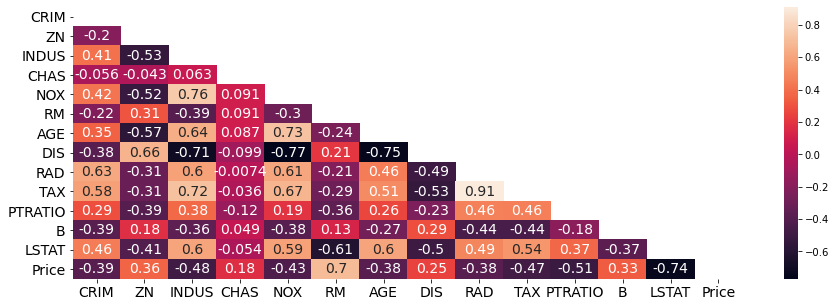

In [327]:
mask = np.zeros_like(data.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True

plt.figure(figsize=[15,5])
sns.heatmap(data=data.corr(), mask=mask, annot=True, annot_kws={"size":14} );
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
plt.show();

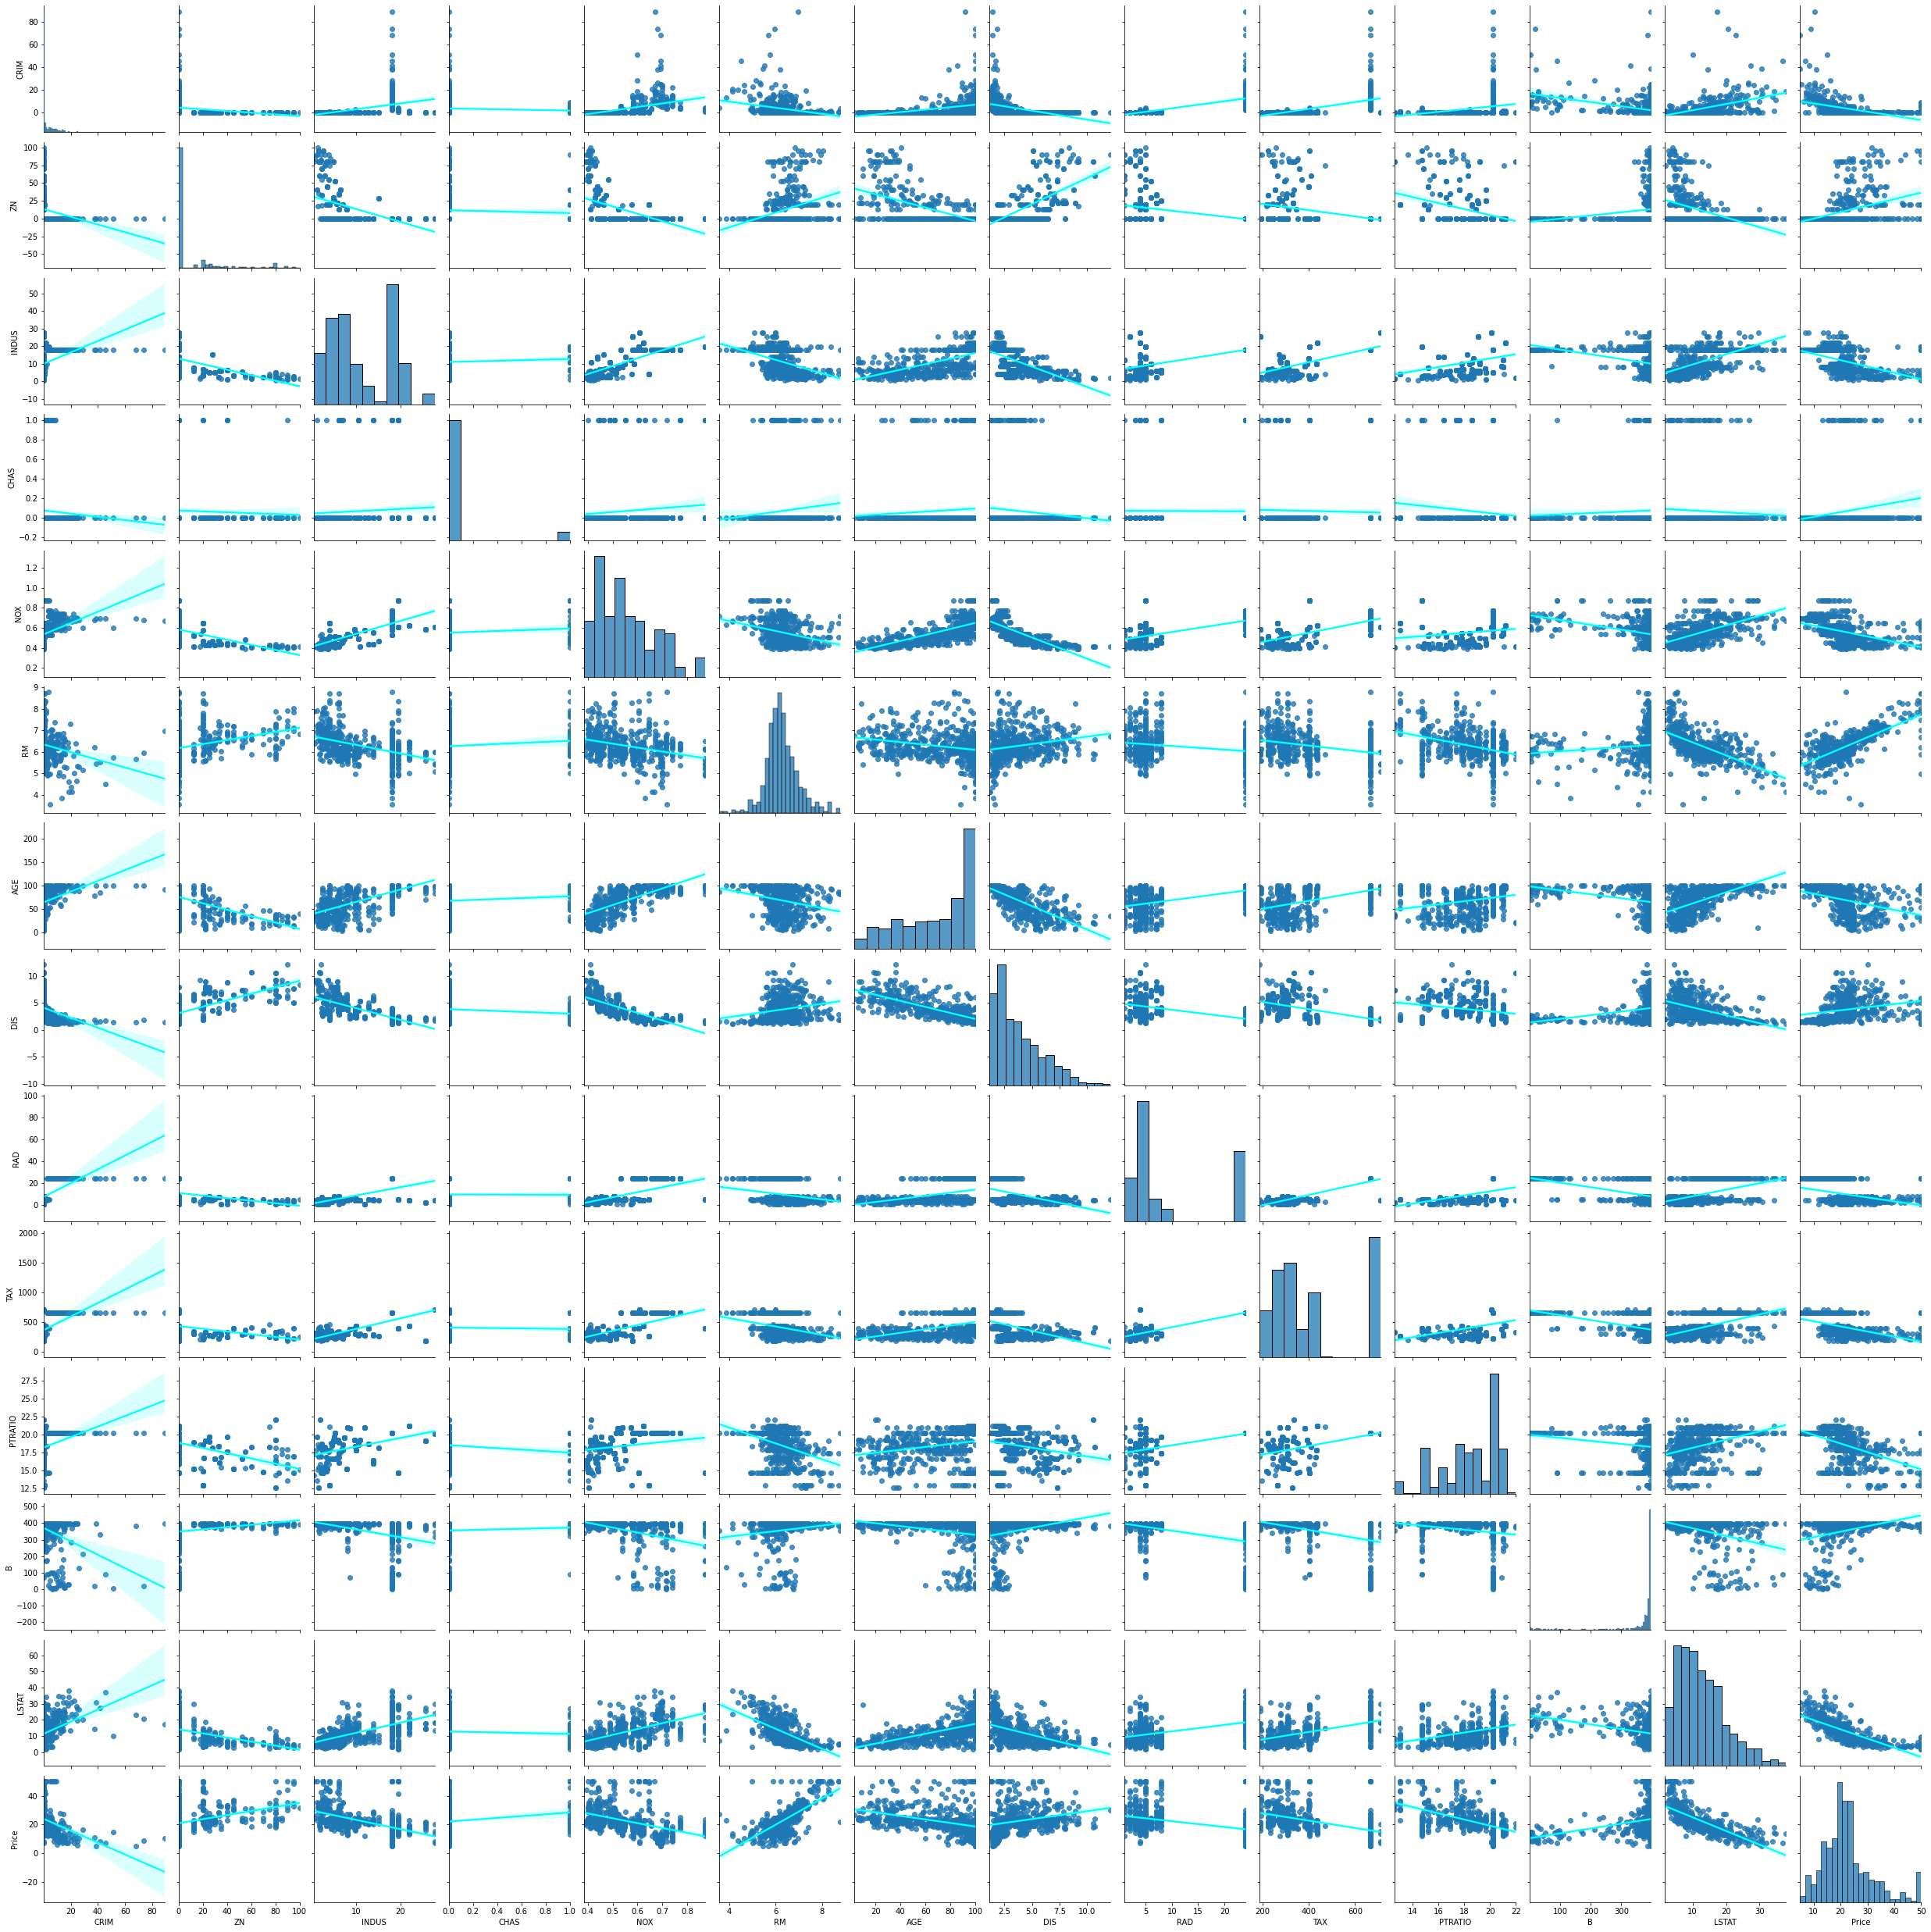

CPU times: user 1min 43s, sys: 953 ms, total: 1min 44s
Wall time: 45 s


In [328]:
%%time

sns.pairplot(data=data, kind='reg', plot_kws={'line_kws':{'color':'cyan'}});
plt.show();

In [329]:
prices = data['Price']
features = data.drop(['Price'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size = 0.2, 
                                                   random_state = 10)

# % of training set
len(X_train)/len(features)

0.7984189723320159

In [330]:
# % of test set
len(X_test)/len(features)

0.2015810276679842

## Multivariable Regression

In [331]:
regr = LinearRegression()
regr.fit(X_train,y_train)

LinearRegression()

In [332]:
print('Intercept', regr.intercept_)
pd.DataFrame(data=regr.coef_, index = X_train.columns, columns = ['coef'])

Intercept 36.53305138282463


,coef
CRIM,-0.128181
ZN,0.063198
INDUS,-0.007576
CHAS,1.974515
NOX,-16.271989
RM,3.108456
AGE,0.016292
DIS,-1.483014
RAD,0.303988
TAX,-0.012082


In [333]:
print('Training data r-squared: ', regr.score(X_train, y_train))
print('Testing data r-squared: ', regr.score(X_test, y_test))

Training data r-squared:  0.750121534530608
Testing data r-squared:  0.670933983911565


In [334]:
X_incl_const = sm.add_constant(X_train)

model = sm.OLS(y_train, X_incl_const)
results = model.fit()

print('pvalues that are greater than 5 is considered problemacti and further investigation should be performed on it')
pd.DataFrame({'coef':results.params, 'p-values': round(results.pvalues, 3)})


pvalues that are greater than 5 is considered problemacti and further investigation should be performed on it


,coef,p-values
const,36.533051,0.000
CRIM,-0.128181,0.000
ZN,0.063198,0.000
INDUS,-0.007576,0.905
CHAS,1.974515,0.033
NOX,-16.271989,0.000
RM,3.108456,0.000
AGE,0.016292,0.262
DIS,-1.483014,0.000
RAD,0.303988,0.000


## Data Transformation

In [335]:
data['Price'].skew()

1.1080984082549072

In [336]:
y_log = np.log(data['Price'])
y_log.skew()

-0.33032129530987864

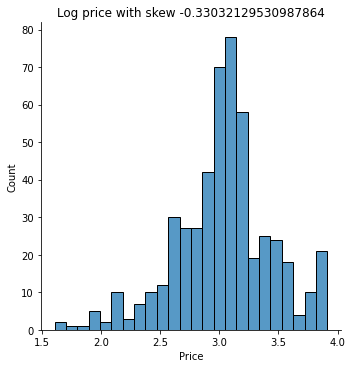

In [337]:
sns.displot(y_log);
plt.title(f'Log price with skew {y_log.skew()}');

/Users/dougymenns/opt/anaconda3/lib/python3.8/site-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


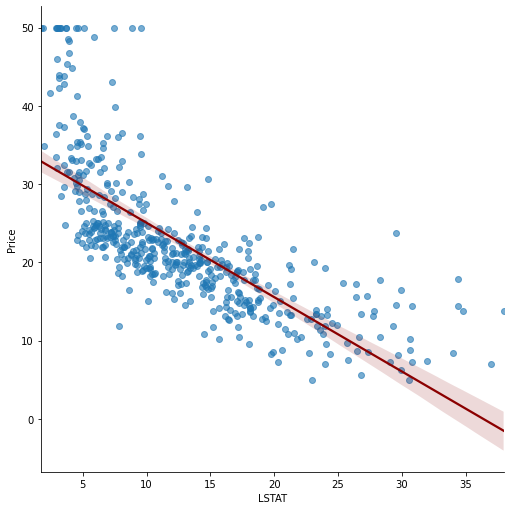

In [338]:
sns.lmplot(x='LSTAT', y='Price', data=data, size=7, scatter_kws={'alpha':0.6}, line_kws={'color':'darkred'});

/Users/dougymenns/opt/anaconda3/lib/python3.8/site-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


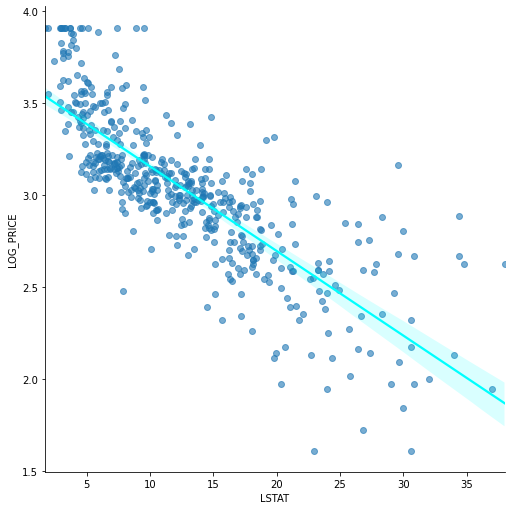

In [339]:
transformed_data = features
transformed_data['LOG_PRICE'] = y_log

sns.lmplot(x='LSTAT', y='LOG_PRICE', data=transformed_data, size=7, scatter_kws={'alpha':0.6}, line_kws={'color':'cyan'});
plt.show()

## Regression Using Log Price

In [340]:
prices = np.log(data['Price']) #using log prices now
features = data.drop(['Price'], axis=1)
 
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size = 0.2, 
                                                   random_state = 10)
regr = LinearRegression()
regr.fit(X_train, y_train)

# % of training set
len(X_train)/len(features)

0.7984189723320159

In [341]:
print('Training data r-squared: ', regr.score(X_train, y_train))
print('Testing data r-squared: ', regr.score(X_test, y_test))

Training data r-squared:  0.7930234826697584
Testing data r-squared:  0.744692230626075


In [342]:
print('Intercept', regr.intercept_)
pd.DataFrame(data=regr.coef_, index = X_train.columns, columns = ['coef'])


Intercept 4.059943871775207


,coef
CRIM,-0.010672
ZN,0.001579
INDUS,0.002030
CHAS,0.080331
NOX,-0.704068
RM,0.073404
AGE,0.000763
DIS,-0.047633
RAD,0.014565
TAX,-0.000645


In [343]:
# charles river property premium
# in order to interpret the premium price for charles river, we'd have to convert the log price to the natural log
("premium {:.2f}".format(np.e**0.080331))

'premium 1.08'

## Testing for multicolineariry

In [344]:
variance_inflation_factor(exog=X_incl_const.values, exog_idx=1)

1.714525044393249

In [345]:
len(X_incl_const.columns)

14

In [346]:
vif = [variance_inflation_factor(exog=X_incl_const.values, exog_idx=col) for col in range(len(X_incl_const.columns))]
vif

[597.5487126763895,
 1.714525044393249,
 2.3328224265597597,
 3.943448822674638,
 1.0788133385000576,
 4.410320817897634,
 1.8404053075678564,
 3.3267660823099394,
 4.222923410477865,
 7.314299817005058,
 8.508856493040817,
 1.8399116326514064,
 1.3386713255364715,
 2.812544292793034]

In [347]:
pd.DataFrame({'feature': X_incl_const.columns, 'vif':np.round(vif,2)})

,feature,vif
0,const,597.55
1,CRIM,1.71
2,ZN,2.33
3,INDUS,3.94
4,CHAS,1.08
5,NOX,4.41
6,RM,1.84
7,AGE,3.33
8,DIS,4.22
9,RAD,7.31


## Model Simplication and BIC


In [348]:
# Original model with log prices and all features
X_incl_const = sm.add_constant(X_train)

model = sm.OLS(y_train, X_incl_const)
results = model.fit()

org_coef = pd.DataFrame({'coef':results.params, 'p-values': round(results.pvalues, 3)})

print('BIC is ', results.bic)
print('r-squared is ', results.rsquared)

BIC is  -139.74997769478875
r-squared is  0.7930234826697583


In [349]:
# Reduced model #1 excluding INDUS
X_incl_const = sm.add_constant(X_train)
X_incl_const = X_incl_const.drop(['INDUS'], axis=1)

model = sm.OLS(y_train, X_incl_const)
results = model.fit()

coef_minus_indus = pd.DataFrame({'coef':results.params, 'p-values': round(results.pvalues, 3)})

print('BIC is ', results.bic)
print('r-squared is ', results.rsquared)

BIC is  -145.14508855591163
r-squared is  0.7927126289415163


In [350]:
# Reduced model #2 excluding INDUS & AGE (this is from the significant p values that were observed)
X_incl_const = sm.add_constant(X_train)
X_incl_const = X_incl_const.drop(['INDUS','AGE'], axis=1)

model = sm.OLS(y_train, X_incl_const)
results = model.fit()

reduced_coef = pd.DataFrame({'coef':results.params, 'p-values': round(results.pvalues, 3)})

print('BIC is ', results.bic)
print('r-squared is ', results.rsquared)

BIC is  -149.49934294224678
r-squared is  0.7918657661852815


It's observed that when INDUS & AGE is removed r-squared isn't penalized that much, but BIC significantly changed. hence it's the model with INDUS and AGE is best with low multicolinearity 

In [351]:
frames = [org_coef, coef_minus_indus, reduced_coef]
pd.concat(frames, axis = 1)

,coef,p-values,coef,p-values,coef,p-values
const,4.059944,0.000,4.056231,0.000,4.035922,0.000
CRIM,-0.010672,0.000,-0.010721,0.000,-0.010702,0.000
ZN,0.001579,0.009,0.001551,0.010,0.001461,0.014
INDUS,0.002030,0.445,NaN,NaN,NaN,NaN
CHAS,0.080331,0.038,0.082795,0.032,0.086449,0.025
NOX,-0.704068,0.000,-0.673365,0.000,-0.616448,0.000
RM,0.073404,0.000,0.071739,0.000,0.076133,0.000
AGE,0.000763,0.209,0.000766,0.207,NaN,NaN
DIS,-0.047633,0.000,-0.049394,0.000,-0.052692,0.000
RAD,0.014565,0.000,0.014014,0.000,0.013743,0.000


## Residuals and Residual Plots

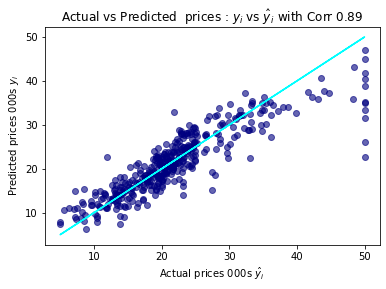

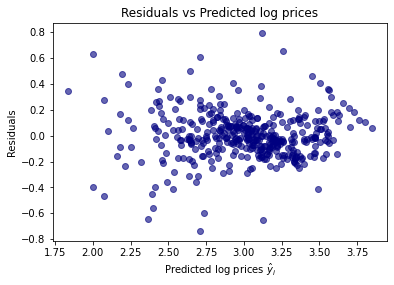

<Figure size 720x576 with 0 Axes>

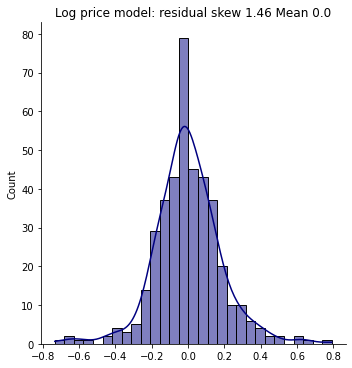

mean of residuals is  -0.0
skewness of residuals is  0.12


In [352]:
# modified model: transformed (using log prices) & simplified (dropping two features)
prices = np.log(data['Price']) #using log prices now
features = data.drop(['Price','INDUS','AGE'], axis=1)
 
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size = 0.2, 
                                                   random_state = 10)
# using scikit learn
# regr = LinearRegression()
# regr.fit(X_train, y_train)

# using stats model
X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_incl_const)
results = model.fit()

# residuals
# residuals = y_train - results.fittedvalues
# results.resid
corr = round(y_train.corr(results.fittedvalues), 2)
plt.plot(np.e**y_train,np.e** y_train, color='cyan')
plt.scatter(x=np.e**y_train, y=np.e**results.fittedvalues, c='navy', alpha=0.6)
plt.title(f'Actual vs Predicted  prices : $ y _i$ vs $\hat y_i$ with Corr {corr}');
plt.ylabel('Predicted prices 000s $y _i$');
plt.xlabel('Actual prices 000s $\haty _i$');
plt.show()

# residuals vs predicted prices
plt.scatter(x=results.fittedvalues, y=results.resid, alpha=0.6, c='navy');
plt.xlabel('Predicted log prices $\hat y _i$');
plt.ylabel('Residuals');
plt.title('Residuals vs Predicted log prices');
plt.show()
# it's observed that most of the values are centered around 0, which is a good sign. 
# Also the outliers of prices in the intial can be seen aligned at the upper right side of the graph
# Also this graph is randomly distributed, which is a good indication

# always visualize your analysis to be double sure.
plt.figure(figsize=[10,8]);
sns.displot(results.resid, color='navy', kde=True);
plt.title(f'Log price model: residual skew {resid_skew} Mean {resid_mean}');
plt.show()

# distribution of residuals (log prices) - checking for normality
resid_mean = round(results.resid.mean(),2)
resid_skew = round(results.resid.skew(),2)
print('mean of residuals is ', resid_mean )
print('skewness of residuals is ', resid_skew)



# Mean squared error & rsquared
reduced_log_mse = round(results.mse_resid, 3)
reduced_log_rsquared = round(results.rsquared, 3)

In [353]:
# challenge: using the original model with all the features and normal prices generate:
# plot of actual vs predicted prices (incl correlation) using a different color
# plot of residuals vs predicted prices
# plot of distributioin of residuals (incl skew)
# analyse the results

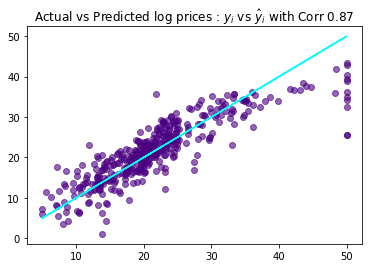

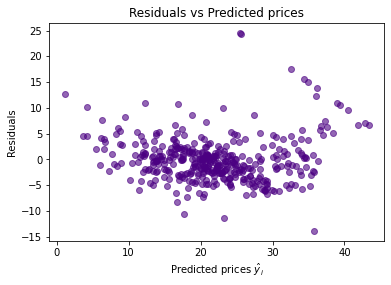

<Figure size 720x576 with 0 Axes>

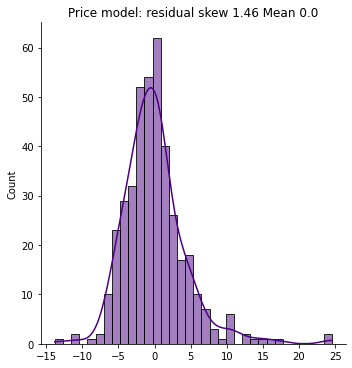

In [354]:
# Original model: normal prices & all features
prices = data['Price']
features = data.drop(['Price'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, prices, random_state = 10, test_size = 0.2)

X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_incl_const)
results = model.fit()

corr = round(y_train.corr(results.fittedvalues), 2);
plt.scatter(x=y_train, y=results.fittedvalues, c='indigo', alpha=0.6);
plt.plot(y_train, y_train, color='cyan');
plt.title(f'Actual vs Predicted log prices : $ y _i$ vs $\hat y_i$ with Corr {corr}');
plt.show()

# residuals vs predicted prices
plt.scatter(x=results.fittedvalues, y=results.resid, alpha=0.6, color='indigo');
plt.xlabel('Predicted prices $\hat y _i$');
plt.ylabel('Residuals');
plt.title('Residuals vs Predicted prices');
plt.show()

# Distribution of Residuals - checking normality
resid_mean = round(results.resid.mean(),2)
resid_skew = round(results.resid.skew(),2)
plt.figure(figsize=[10,8]);
sns.displot(results.resid, color='indigo', kde=True);
plt.title(f'Price model: residual skew {resid_skew} Mean {resid_mean}');


# Mean squared error & rsquared
full_normal_mse = round(results.mse_resid, 3)
full_normal_rsquared = round(results.rsquared, 3)

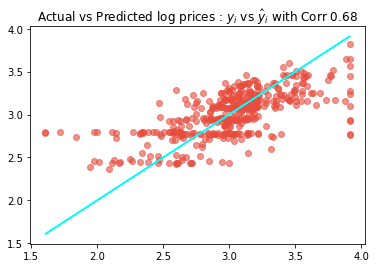

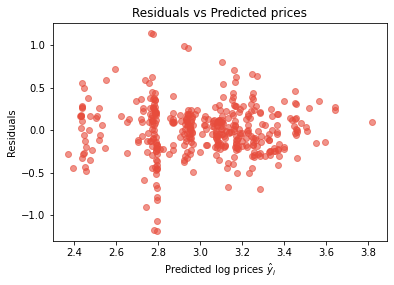

<Figure size 720x576 with 0 Axes>

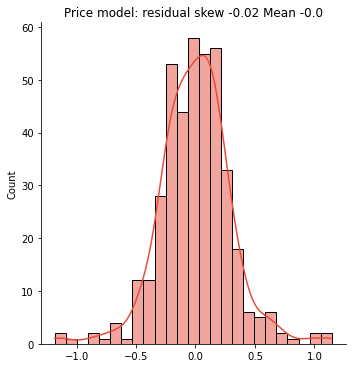

In [355]:
# Original model: normal prices & all features
prices = np.log(data['Price'])
features = data.drop(['Price','INDUS','AGE', 'LSTAT', 'NOX', 'CRIM', 'RM'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, prices, random_state = 10, test_size = 0.2)

X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_incl_const)
results = model.fit()

corr = round(y_train.corr(results.fittedvalues), 2);
plt.scatter(x=y_train, y=results.fittedvalues, c='#e74c3c', alpha=0.6);
plt.plot(y_train, y_train, color='cyan');
plt.title(f'Actual vs Predicted log prices : $ y _i$ vs $\hat y_i$ with Corr {corr}');
plt.show()

# residuals vs predicted prices
plt.scatter(x=results.fittedvalues, y=results.resid, alpha=0.6, color='#e74c3c');
plt.xlabel('Predicted log prices $\hat y _i$');
plt.ylabel('Residuals');
plt.title('Residuals vs Predicted prices');
plt.show()

# Distribution of Residuals - checking normality
resid_mean = round(results.resid.mean(),2)
resid_skew = round(results.resid.skew(),2)
plt.figure(figsize=[10,8]);
sns.displot(results.resid, color='#e74c3c', kde=True);
plt.title(f'Price model: residual skew {resid_skew} Mean {resid_mean}');

# Mean squared error & rsquared
omitted_var_mse = round(results.mse_resid, 2)
omitted_var_rsquared = round(results.rsquared, 2)


In [362]:
pd.DataFrame({'MSE': [reduced_log_mse,full_normal_mse,omitted_var_mse],
              'R-Squared':[reduced_log_rsquared, full_normal_rsquared, omitted_var_rsquared],
              'RMSE':np.sqrt([reduced_log_mse,full_normal_mse,omitted_var_mse])}, 
             index=['reduced_log', 'full_normal', 'omitted_var'])

,MSE,R-Squared,RMSE
reduced_log,0.035,0.792,0.187083
full_normal,19.921,0.750,4.463295
omitted_var,0.090,0.460,0.300000


- Always look out for MSE close to 0 or 0. when comparing your models on mse be mindful of the unit. (eg whether log price or actual)
- Always note that rsquared ranges from 0 - 1

In [371]:
# Challenge: Our estimate for a house price is $30,000. Calculate the upper and lower bound for a 
# 95% prediction interval using the reduced log model

print('1 s.d in log prices is ', np.sqrt(reduced_log_mse))
print('2 s.d in log prices is ', 2*np.sqrt(reduced_log_mse))
print('\n')
# to find the upper bound for $30,000
# = log of 30 + 2 s.d
upper_bound = np.log(30) + 2*np.sqrt(reduced_log_mse)
print('The upper bound in log prices for a 95% prediction interval is ', upper_bound)
print('The upper bound in normal prices for a 95% prediction interval is ', np.e**upper_bound * 1000)
print('\n')

# to find the lower bound for $30,000
# = log of 30 + -2 s.d
upper_bound = np.log(30) + -2*np.sqrt(reduced_log_mse)
print('The upper bound in log prices for a 95% prediction interval is ', upper_bound)
print('The upper bound in normal prices for a 95% prediction interval is ', np.e**upper_bound * 1000)

1 s.d in log prices is  0.18708286933869708
2 s.d in log prices is  0.37416573867739417


The upper bound in log prices for a 95% prediction interval is  3.7753631203395495
The upper bound in normal prices for a 95% prediction interval is  43613.34233239937


The upper bound in log prices for a 95% prediction interval is  3.0270316429847615
The upper bound in normal prices for a 95% prediction interval is  20635.886906824155
